# Implement Autocorrelation Function with Exponential Weighting (EW-ACF)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import src.losses.acf_losses as EWACF

$$\mu_t = \lambda \mu_{t-1} + (1 - \lambda) x_t$$
$$V_t = \lambda V_{t-1} + (1 - \lambda) (x_t - \mu_t)^2$$
$$S_t(k) = \lambda S_{t-1}(k) + (1 - \lambda) (x_t - \mu_t)(x_{t-k} - \mu_{t-k})$$
$$\rho_t(k) = \frac{S_t(k)}{\sqrt{V_t \cdot V_{t-k}}}$$

In [9]:
LENGTH = 1000
START = -0.5

time_series_1 = [START]
for i in range(LENGTH-1):
    time_series_1.append(0.9 * time_series_1[i] + 0.1 * np.random.randn())

time_series_2 = [time_series_1[-1]]
for i in range(LENGTH-1):
    time_series_2.append(-0.9 * time_series_2[i] + 0.1 * np.random.randn())

time_series_3 = list(np.random.randn(LENGTH)*0.2)

time_series = np.concatenate(
    [
        time_series_1,
        time_series_2,
        time_series_3
    ]
)

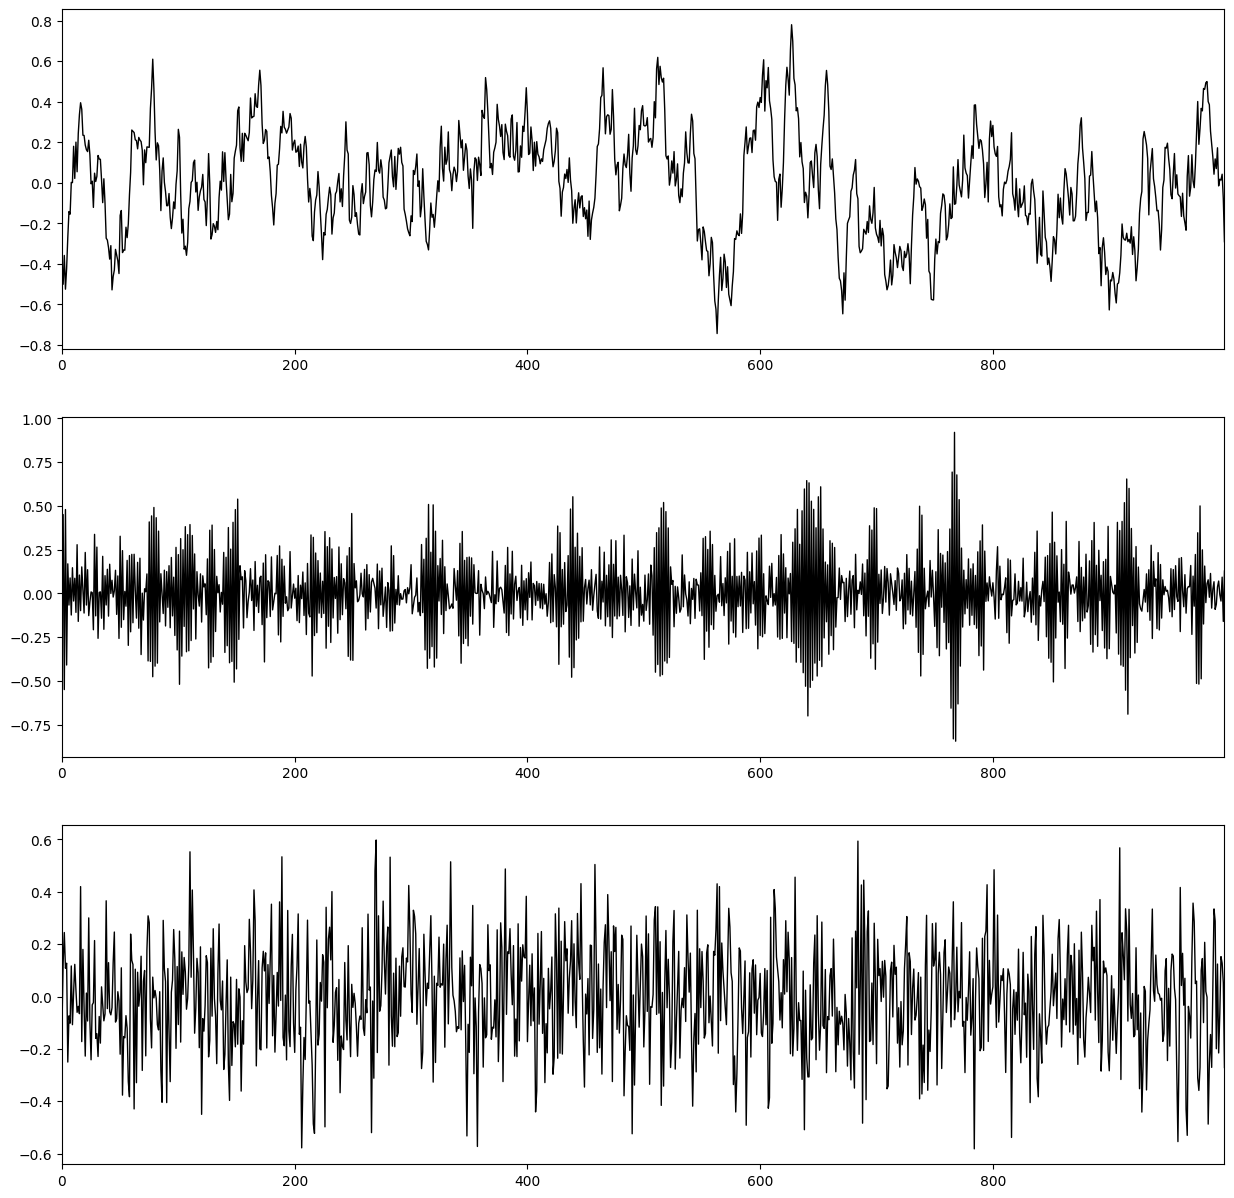

In [10]:
## Plot Synthetic Data

plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.margins(x=0)
plt.plot(time_series_1, color='black', linewidth=1)
plt.subplot(3,1,2)
plt.margins(x=0)
plt.plot(time_series_2, color='black', linewidth=1)
plt.subplot(3,1,3)
plt.margins(x=0)
plt.plot(time_series_3, color='black', linewidth=1)
plt.show()

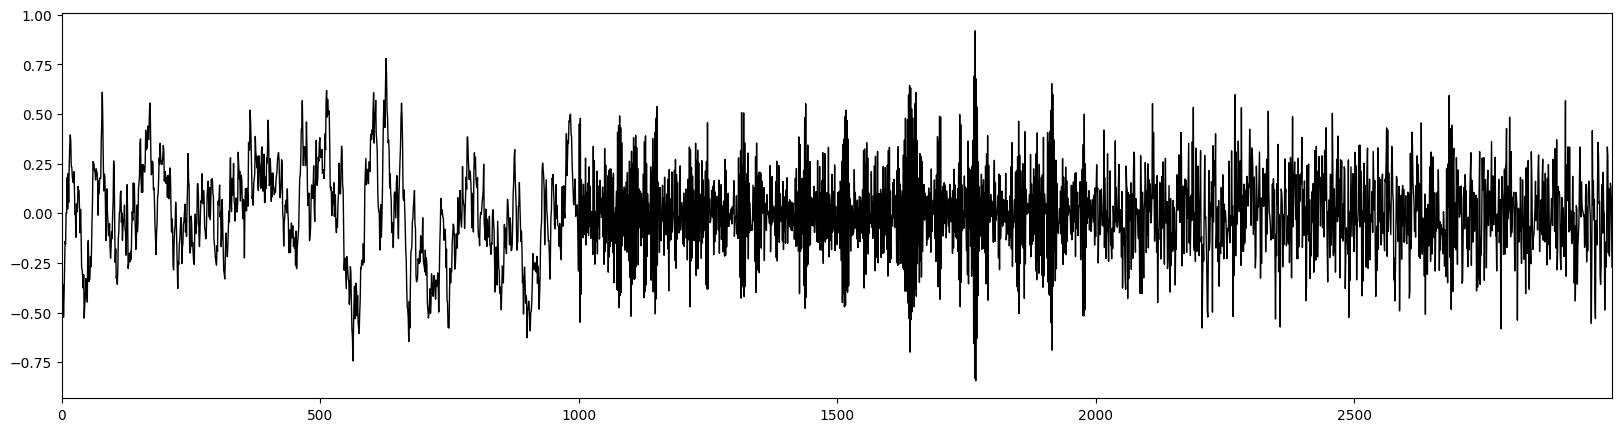

In [11]:
## Plot Complete Time Series

plt.figure(figsize=(20, 5))
plt.margins(x=0)
plt.plot(time_series, color='black', linewidth=1)

In [ ]:
## Plot EW-ACF sequence
ew_acf_seq = []
std_acf_seq = []

# EW-ACF sequence
ew_acf_seq = acf_losses(time_series, lag=1, lambda_=0.8, last_only=False)

# Standard ACF sequence
for i in range(1, len(time_series)):
    std_acf_seq.append(std_acf(time_series[:i+1], lag=1))

TypeError: 'module' object is not callable

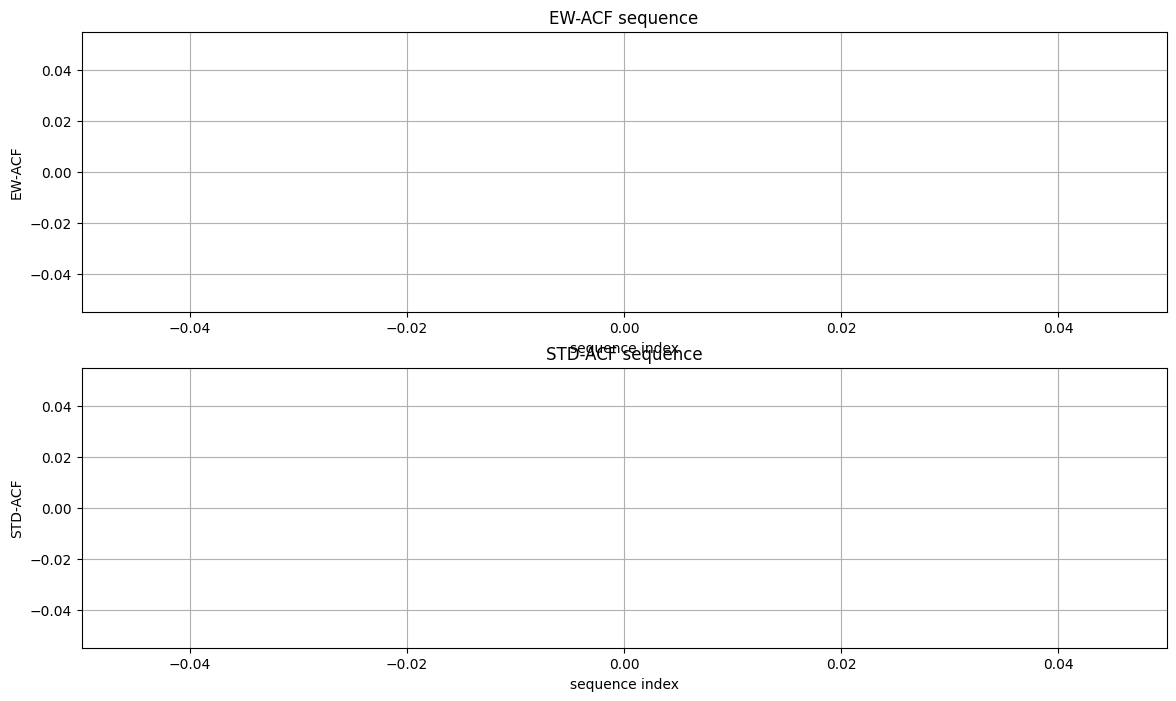

In [13]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.margins(x=0)
plt.grid(True)
plt.plot(ew_acf_seq)
plt.title('EW-ACF sequence')
plt.xlabel('sequence index')
plt.ylabel('EW-ACF')

plt.subplot(2, 1, 2)
plt.margins(x=0)
plt.grid(True)
plt.plot(std_acf_seq)
plt.title('STD-ACF sequence')
plt.xlabel('sequence index')
plt.ylabel('STD-ACF')
plt.show()